# `AA Workshop 3` — Coding Challenge

Complete the tasks below to practice working with NumPy & Pandas from `W3_NumPy_Pandas.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- iterable comprehensions
- working with NumPy & Pandas
- data manipulation and analysis

## Task 1 - NumPy Arrays & List Comprehensions

Create a function `generate_random_arrays(k)` that generates k numpy arrays using list comprehensions. Each array should:
- Have length i (where i goes from 1 to k)
- Be filled with random integers in range (1, i+1)
- Use list comprehensions for the implementation

When called, the function should print all generated arrays (one array per line).

In [1]:
# your code here
import numpy as np

def generate_random_arrays(k):
    """Generate k numpy arrays using list comprehensions."""

    # use list comprehension to create arrays
    arrays = [np.random.randint(low=1, high=i+1, size=i) for i in range(1, k+1)]
    
    # print each array
    for i, arr in enumerate(arrays, 1):
        print(f"Array {i}: {arr}")

# test the function
generate_random_arrays(9)

Array 1: [1]
Array 2: [2 2]
Array 3: [3 1 3]
Array 4: [2 2 1 3]
Array 5: [2 2 4 5 3]
Array 6: [2 3 1 5 5 1]
Array 7: [5 6 2 2 4 5 1]
Array 8: [6 7 2 7 7 6 4 7]
Array 9: [9 7 8 3 6 2 2 7 2]


## Task 2 - Image Reconstruction with Array Operations

Reconstruct a hidden image by combining and reshaping two arrays! You'll need to use NumPy's stacking and reshaping functions to piece together the complete picture.

**Your Tasks:**
1. Load the two arrays provided below
2. Figure out how to combine them to reconstruct the original image
3. Display the reconstructed image
4. The image should show a clear pattern when correctly reconstructed

**Hint:**
You can use `plt.imshow(...)` to visualize arrays.

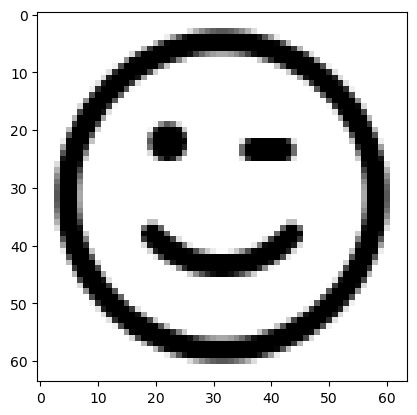

In [2]:
from matplotlib import pyplot as plt # we need this for visualization purposes
import numpy as np

arr1 = np.load('array1.npy')
arr2 = np.load('array2.npy')

# your code here
solution_array = np.hstack([arr1.transpose(1,0,2), arr2.transpose(1,0,2)])

plt.imshow(solution_array)

## Task 3 - Pandas Data Analysis with Titanic Dataset

Analyze the famous Titanic dataset to answer specific questions about passenger survival patterns. You'll need to use various Pandas functions to explore and analyze the data.

**Dataset**: The Titanic dataset contains information about passengers including age, gender, class, fare, and survival status.

**Skills you'll practice:**
- Data exploration with `info()` and `describe()`
- Missing data analysis with `isnull()` and `dropna()`
- Data aggregation with `groupby()`
- Boolean masking for filtering
- Statistical analysis and reporting

In [3]:
import pandas as pd
import seaborn as sns

# load the dataset
data = sns.load_dataset('titanic')

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Answer the following questions using Pandas operations:**

1. **Data Overview**: Get basic summary information about the dataset (number of observations, column data types etc.)
2. **Missing Data**: How many observations with missing values are there? Which column seems particularly problematic and how would you deal with it?
3. **Survival by Gender**: What percentage of males vs females survived?
4. **Age Analysis**: What's the average age of survivors vs non-survivors?
5. **Class vs Survival**: Which passenger class had the highest survival rate?
6. **Young Survivors**: How many passengers under 18 survived?

In [4]:
# your code here

# 1. Data Overview
print("=== 1. DATA OVERVIEW ===")
data.info()

# 2. Missing Data
print("\n=== 2. MISSING DATA ===")
print("Obs. containing missing data:", len(data)-len(data.dropna()))
print("Note: The 'deck' column has many missing values - one might consider dropping it depending on the data science goal")

# 3. Survival by Gender
print("\n=== 3. SURVIVAL BY GENDER ===")
survival_by_gender = data.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
survival_by_gender['survival_rate'] = survival_by_gender['mean'] * 100
print(survival_by_gender)

# 4. Age Analysis
print("\n=== 4. AGE ANALYSIS ===")
age_analysis = data.dropna(subset=['age']).groupby('survived')['age'].mean()
print(f"Survivors: {age_analysis[1]:.2f} years")
print(f"Non-survivors: {age_analysis[0]:.2f} years")

# 5. Class vs Survival
print("\n=== 5. CLASS VS SURVIVAL ===")
class_survival = data.groupby('class', observed=True)['survived'].mean() * 100
print(class_survival)

# 6. Young Survivors
print("\n=== 6. YOUNG SURVIVORS ===")
young_survivors = data[(data['age'] < 18) & (data['survived'] == 1)].shape[0]
young_total = data[data['age'] < 18].shape[0]
young_survival_rate = round((young_survivors) / young_total * 100, 1)
print(f"Passengers under 18 who survived: {young_survivors}")
print(f"Total passengers under 18: {young_total}")
print(f"Survival rate for passengers under 18: {young_survival_rate}%")

=== 1. DATA OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

=== 2. MISSING DATA ===
Obs. containing missing data: